In [46]:
from autocluster import AutoCluster
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
df = pd.DataFrame(datasets.load_digits()['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [50]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": ['MiniBatchKMeans', 'KMeans'],
    "dim_reduction_alg_ls": ['PCA', 'KernelPCA', 'FastICA'],
    "n_evaluations": 10,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 50,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "warmstart": False,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": []
}
smac_obj, opt_cfg = cluster.fit(**fit_params)

1360/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {MiniBatchKMeans, KMeans}, Default: MiniBatchKMeans
    dim_reduction_choice, Type: Categorical, Choices: {PCA, KernelPCA, FastICA}, Default: PCA
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: logcosh
    kernel___KernelPCA, Type: Categorical, Choices: {linear, poly, rbf, sigmoid, cosine}, Default: linear
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 30], Default: 10
    n_components___FastICA, Type: Ordinal, Sequence: {2, 3}, Default: 2
    n_components___KernelPCA, Type: Ordinal, Sequence: {2, 3, 4, 5, 6, 7, 8, 9}, Default: 2
    n_c

In [57]:
# df = pd.read_csv("../data/Financial_Distress.csv").drop(columns=['Time', 'Company', 'Financial Distress', 'class'])
# df.head(5)

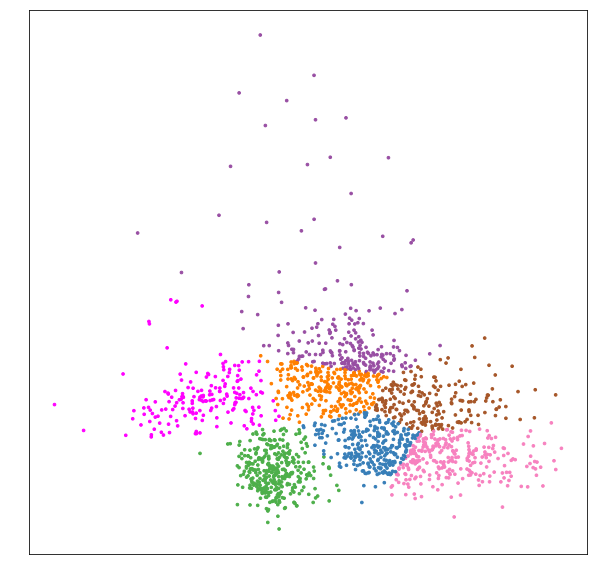

In [53]:
predictions = cluster.predict(df)

In [54]:
Counter(predictions)

Counter({0: 290, 1: 264, 2: 351, 3: 181, 4: 276, 5: 210, 6: 225})

In [55]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.48853339773150894